In [31]:
import gcloud
import io
from PIL import Image as pil
import os

In [2]:
from google.cloud import vision
from google.cloud.vision import types

In [3]:
credential_path = "C://Users/HSS/my-project-62641-262311-3573b8c751bc.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

client = vision.ImageAnnotatorClient()

In [4]:
uri = 'https://image.ohou.se/i/bucketplace-v2-development/uploads/productions/1542621980_107096_1.jpg?gif=1&w=640&h=640&c=c&webp=1'

In [12]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()

image = vision.types.Image()
image.source.image_uri = uri

In [16]:
objects
for object_ in objects:
    print('\n{} (confidence: {})'.format(object_.name, object_.score))
    print('Normalized bounding polygon vertices: ')
    for vertex in object_.bounding_poly.normalized_vertices:
        print(' - ({}, {})'.format(vertex.x, vertex.y))

In [15]:
for object_ in objects:
    print(object)

In [10]:
def localize_objects_uri(uri):
        """Localize objects in the image on Google Cloud Storage

        Args:
        uri: The path to the file in Google Cloud Storage (gs://...)
        """
        from google.cloud import vision
        client = vision.ImageAnnotatorClient()

        image = vision.types.Image()
        image.source.image_uri = uri

        objects = client.object_localization(
            image=image).localized_object_annotations

        print('Number of objects found: {}'.format(len(objects)))
        for object_ in objects:
            print('\n{} (confidence: {})'.format(object_.name, object_.score))
            print('Normalized bounding polygon vertices: ')
            for vertex in object_.bounding_poly.normalized_vertices:
                print(' - ({}, {})'.format(vertex.x, vertex.y))

In [11]:
localize_objects_uri(uri)

Number of objects found: 2

Houseplant (confidence: 0.769603431224823)
Normalized bounding polygon vertices: 
 - (0.31905603408813477, 0.17167021334171295)
 - (0.449738472700119, 0.17167021334171295)
 - (0.449738472700119, 0.4588274359703064)
 - (0.31905603408813477, 0.4588274359703064)

Pillow (confidence: 0.5900425910949707)
Normalized bounding polygon vertices: 
 - (0.08931291848421097, 0.4690288305282593)
 - (0.27031078934669495, 0.4690288305282593)
 - (0.27031078934669495, 0.6186360716819763)
 - (0.08931291848421097, 0.6186360716819763)


In [19]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()

image = vision.types.Image()
image.source.image_uri = uri

objects = client.object_localization(
            image=image).localized_object_annotations

print(objects)

# print('Number of objects found: {}'.format(len(objects)))
# for object_ in objects:
#     print('\n{} (confidence: {})'.format(object_.name, object_.score))
#     print('Normalized bounding polygon vertices: ')
#     for vertex in object_.bounding_poly.normalized_vertices:
#         print(' - ({}, {})'.format(vertex.x, vertex.y))

[mid: "/m/03fp41"
name: "Houseplant"
score: 0.769603431224823
bounding_poly {
  normalized_vertices {
    x: 0.31905603408813477
    y: 0.17167021334171295
  }
  normalized_vertices {
    x: 0.449738472700119
    y: 0.17167021334171295
  }
  normalized_vertices {
    x: 0.449738472700119
    y: 0.4588274359703064
  }
  normalized_vertices {
    x: 0.31905603408813477
    y: 0.4588274359703064
  }
}
, mid: "/m/034c16"
name: "Pillow"
score: 0.5900425910949707
bounding_poly {
  normalized_vertices {
    x: 0.08931291848421097
    y: 0.4690288305282593
  }
  normalized_vertices {
    x: 0.27031078934669495
    y: 0.4690288305282593
  }
  normalized_vertices {
    x: 0.27031078934669495
    y: 0.6186360716819763
  }
  normalized_vertices {
    x: 0.08931291848421097
    y: 0.6186360716819763
  }
}
]


In [ ]:
os.chdir('C://Users/HSS/Documents/dev/ohouse/pics')
p = 'C://Users/HSS/Documents/dev/ohouse/pics/'
new_path = p + os.listdir()[0]

In [79]:
def localize_objects(path):
    """Detects text in the file."""

    # Google Vision API needs byte type data to use
    # Read an image which you want to detect as binary type
    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    # Transform byte type to Image which Google Vision API supports
    image = types.Image(content=content)
    objects = client.object_localization(
        image=image).localized_object_annotations
    
    print('Number of objects found: {}'.format(len(objects)))
    blank  = {}
    i = 1
    for object_ in objects:

        print('\n{} (confidence: {})'.format(object_.name, object_.score))
        print('Normalized bounding polygon vertices: ')
        
        vertexes = []
        for vertex in object_.bounding_poly.normalized_vertices:
            vertexes.append((vertex.x, vertex.y))
#             print(' - ({}, {})'.format(vertex.x, vertex.y))
        blank[object_.name + str(i)] = vertexes
        i+=1
    return blank

In [80]:
result = localize_objects(new_path)
result

Number of objects found: 3

Lighting (confidence: 0.9370527863502502)
Normalized bounding polygon vertices: 

Lighting (confidence: 0.9352655410766602)
Normalized bounding polygon vertices: 

Lighting (confidence: 0.9286476969718933)
Normalized bounding polygon vertices: 


{'Lighting1': [(0.3813754618167877, 0.17480076849460602),
  (0.628128170967102, 0.17480076849460602),
  (0.628128170967102, 0.8598747849464417),
  (0.3813754618167877, 0.8598747849464417)],
 'Lighting2': [(0.648310124874115, 0.17268140614032745),
  (0.8816238045692444, 0.17268140614032745),
  (0.8816238045692444, 0.8615955710411072),
  (0.648310124874115, 0.8615955710411072)],
 'Lighting3': [(0.11145538836717606, 0.17337848246097565),
  (0.3545405864715576, 0.17337848246097565),
  (0.3545405864715576, 0.8561030030250549),
  (0.11145538836717606, 0.8561030030250549)]}

In [92]:
for name,vertex in result.items():
    print(name, '\n', vertex)
    print('\n')

Lighting1 
 [(0.3813754618167877, 0.17480076849460602), (0.628128170967102, 0.17480076849460602), (0.628128170967102, 0.8598747849464417), (0.3813754618167877, 0.8598747849464417)]


Lighting2 
 [(0.648310124874115, 0.17268140614032745), (0.8816238045692444, 0.17268140614032745), (0.8816238045692444, 0.8615955710411072), (0.648310124874115, 0.8615955710411072)]


Lighting3 
 [(0.11145538836717606, 0.17337848246097565), (0.3545405864715576, 0.17337848246097565), (0.3545405864715576, 0.8561030030250549), (0.11145538836717606, 0.8561030030250549)]




In [9]:
from PIL import Image
im = Image.open('python.png')
cropImage = im.crop((100, 100, 150, 150))
cropImage.save('python-crop.jpg')

AttributeError: module 'PIL.Image' has no attribute 'save'

In [ ]:
### 이미지 잘라서 저장하기
### 저장한 이미지들 메모리에 띄우기
### 입력된 이미지와 유사 이미지 가져오기
### 이미지 
### 유사 이미지 상품 정보

In [ ]:
### 유사 이미지 검색
### 배경날리기


### 입력 -> resize
### 거리기반 찾기

#### 뭔가해야함

### 유사 상품 반환하기

- 오늘의집 전등 카테고리 크롤링 : 이미지 URL, 상품 ID, 가격, 판매페이지(완료)
- 이슈: 이미지에 전등 이외 물품이 많다 -> 구글 비전 api를 사용해 전등 이미지 추출

- 찾고 싶은 이미지와 유사한 이미지 검색
- 방법: 가지고 있는 이미지와 입력 이미지의 유사도(유클리드 거리, 코사인 유사도) 비교를 통해 유사 상품 정보 반환
    - 이미지를 로컬에 저장하지 않고 객체화 할 수 있는지
    - PCA로 크롤링한 이미지를 차원 축소 시킨 후 검색 -> 새로운 입력 마다 다시 PCA를 돌려야 함
    - KNN -> 차원이 높을 때 오래 걸림

In [20]:
Image = 'https://image.ohou.se/i/bucketplace-v2-development/uploads/productions/1542621980_107096_1.jpg?gif=1&w=640&h=640&c=c&webp=1'

color, label"

In [21]:
class Vision:
    def __init__(self):
        self.data = []
    def im_trim(self):  # 함수로 만든다
        img_trim = self.img[self.y:self.y+self.h, self.x:self.x+self.w]  # trim한 결과를 img_trim에 담는다
        cv2.imwrite(self.img_name+".jpg", img_trim)  # 저장
        return img_trim
    
    def localize_objects_uri(self,uri, Id):
            """Localize objects in the image on Google Cloud Storage
            Args:
            uri: The path to the file in Google Cloud Storage (gs://...)
            """
            from google.cloud import vision
            client = vision.ImageAnnotatorClient()
            image = vision.types.Image()
            image.source.image_uri = uri
            objects = client.object_localization(
                image=image).localized_object_annotations
            count = 1
            self.img =  cv2.imread('./640.jpg') #### <-여기이름만 바꾸면됨.
            for object_ in objects:
                if (object_.name == "Lighting") & (count==1):
                    self.x = int(round(object_.bounding_poly.normalized_vertices[0].x*640, 0))
                    self.y = int(round(object_.bounding_poly.normalized_vertices[0].y*640, 0))
                    self.w = int(round(object_.bounding_poly.normalized_vertices[2].x*640, 0)) - self.x
                    self.h = int(round(object_.bounding_poly.normalized_vertices[2].y*640, 0)) - self.y
                    print(self.x,self.y,self.w,self.h)
                    self.img_name = Id
                    trim_image = self.im_trim()
                    count += 1
                elif (object_.name == "Lighting") & (count>1):
                    self.x = int(round(object_.bounding_poly.normalized_vertices[0].x*640, 0))
                    self.y = int(round(object_.bounding_poly.normalized_vertices[0].y*640, 0))
                    self.w = int(round(object_.bounding_poly.normalized_vertices[2].x*640, 0)) - self.x
                    self.h = int(round(object_.bounding_poly.normalized_vertices[2].y*640, 0)) - self.y
                    print(self.x,self.y,self.w,self.h)
                    self.img_name = "{}({})".format(Id, str(count))
                    trim_image = self.im_trim()
                    count += 1
            return trim_image

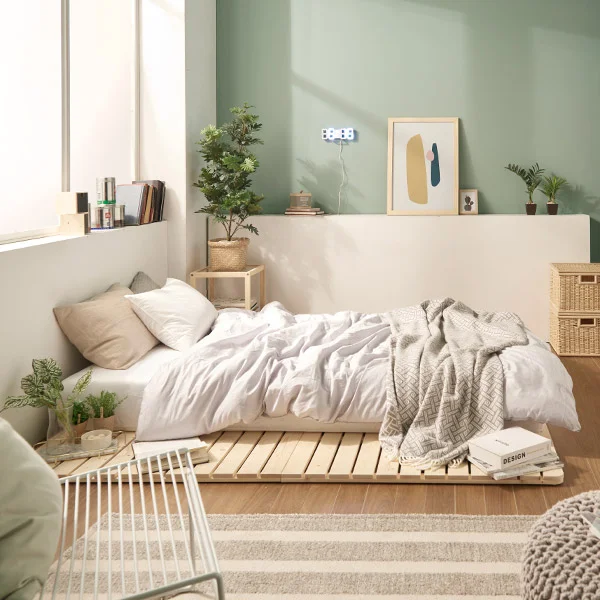

In [51]:
import requests
response = requests.get(uri)
response.content
from io import BytesIO
from PIL import Image
im = BytesIO(response.content)
Image.open(im)

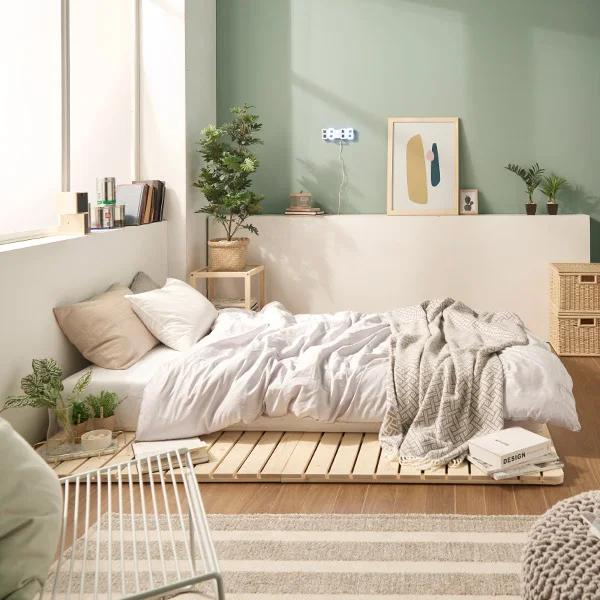

In [44]:
Image.open(BytesIO(response.content)).convert("RGBA")

In [47]:
!pip install opencv-python